In [53]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from numpy.fft import fft

In [58]:
T = 2.5                               # Durada de T segons
fm = 8000                             # Freqüència de mostratge en Hz
fx = 2e3                               # Freqüència de la sinusoide
A = 4                                  # Amplitud de la sinusoide
pi = np.pi                             # Valor del número pi
L = int(fm * T)                      # Nombre de mostres del senyal digital
Tm = 1 / fm                              # Període de mostratge
t = Tm * np.arange(L)                    # Vector amb els valors de la variable temporal, de 0 a T
x = A * np.cos(2 * pi * fx * t)      # Senyal sinusoidal
sf.write('so_exemple1.wav', x, fm)   # Escriptura del senyal a un fitxer en format wav

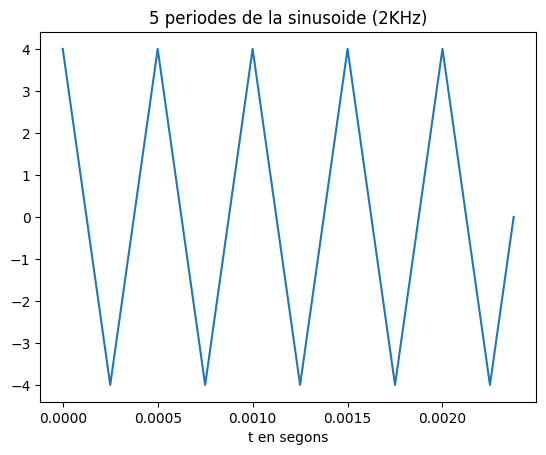

In [60]:
Tx = 1/fx                                   # Període del senyal
Ls = int(fm * 5 * Tx)                           # Nombre de mostres corresponents a 5 períodes de la sinusoide

plt.figure(0)                             # Nova figura
plt.plot(t[0:Ls], x[0:Ls])                # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('5 periodes de la sinusoide (2KHz)')   # Títol del gràfic
plt.show()                                # Visualització de l'objecte gràfic.                     

In [50]:
sd.play(x, fm)                # Reproducció d'àudio

In [55]:
N = 5000                        # Dimensió de la transformada discreta
X = fft(x[0 : Ls], N)           # Càlcul de la transformada de 5 períodes de la sinusoide

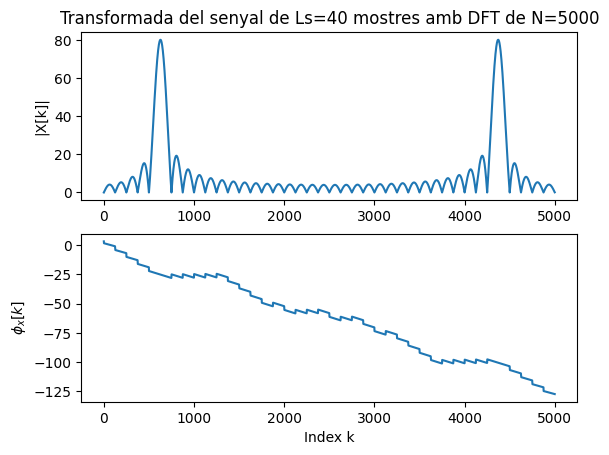

In [56]:
k = np.arange(N)                        # Vector amb els valors 0≤  k<N

plt.figure(1)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
plt.plot(k,abs(X))                    # Representació del mòdul de la transformada
plt.title(f'Transformada del senyal de Ls={Ls} mostres amb DFT de N={N}')   # Etiqueta del títol
plt.ylabel('|X[k]|')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(k,np.unwrap(np.angle(X)))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Index k')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x[k]$')             # Etiqueta de la fase en Latex
plt.show()